### Notebook for running SONATA on cross dataset
Below, we replicate our results for cross dataset reported in *SONATA: Disambiguated manifold alignment of single-cell data.*




In [1]:
import os.path as osp
import yaml
from easydict import EasyDict

import sys
sys.path.insert(1, '../src/')
import sonata
from utils.utils import *
from utils.vis import *
import scotv1

In [2]:
# load parameters and datasets
cfg_url='../src/cfgs/cross.yaml'
with open(cfg_url, 'r',encoding='utf8') as file:
        cfg = EasyDict(yaml.safe_load(file))
basename = osp.basename(osp.dirname(cfg.data_path.dataset_url1))
print("dataset name={}".format(basename))

data1 = load_data(cfg.data_path.dataset_url1)
data2 = load_data(cfg.data_path.dataset_url2)
label1 = load_data(cfg.data_path.label_url1)
label2 = load_data(cfg.data_path.label_url2)
print("data1 shape={}\tdata2 shape={}".format(data1.shape, data2.shape))
print("label1 shape={}\tlabel2 shape={}".format(label1.shape, label2.shape))


dataset name=cross
data1 shape=(300, 1000)	data2 shape=(300, 2000)
label1 shape=(300,)	label2 shape=(300,)


### 1. visualize two modalities

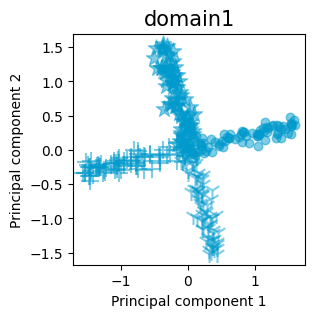

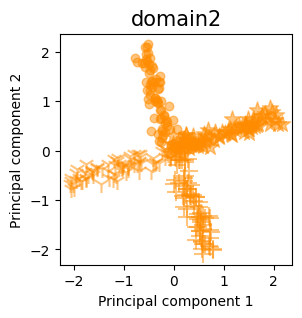

In [3]:
plt_domain_by_label(data1, label1, color='#009ACD', title='domain1', show=True)
plt_domain_by_label(data2, label2, color='#FF8C00', title='domain2', show=True)

### 2. Mapping by SCOT (or any other manifold aligners)

In [4]:
scot = scotv1.SCOT(data1.copy(), data2.copy())
scot.align(k = cfg.scot.k, e=cfg.scot.e, mode=cfg.scot.mode, metric=cfg.scot.metric, normalize=cfg.scot.normalize)
mapping = scot.coupling
x_aligned, y_aligned = projection_barycentric(scot.X, scot.y, mapping, XontoY = cfg.plt.XontoY)

/Users/zhouhan/Applications/anaconda3/envs/py38/lib/python3.8/site-packages/ot/bregman.py:536: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


It.  |Err         
-------------------
    0|7.746992e-03|
   10|1.671188e-09|
   20|1.346978e-15|


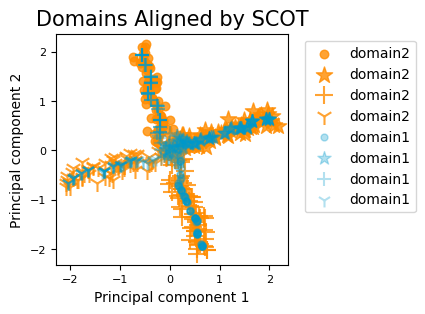

In [5]:
plt_mapping_by_label(x_aligned, y_aligned, label1, label2, show=True)

### 3. cell-cell alternaltive mappings from SONATA

In [6]:
sn = sonata.sonata(kmin=cfg.sonata.kmin, sigma=cfg.sonata.sigma, t=cfg.sonata.t)
alter_mappings = sn.alt_mapping(data=data1) 

constructing knn graph ...
final k =10
calculating cell-wise ambiguity ...
calculating group-wise ambiguity ...
deciding best k for clustering ...
K = 4 groups choosen by elbow method


#### 3.1 cell-cell ambiguities

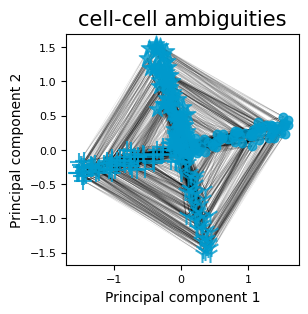

In [7]:
plt_cannotlink_by_label(data1, sn.ambiguous_nodes, label1, sn.ambiguous_links, show=True)

#### 3.2 Ambiguous groups

class_label=0	class_indices=[171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229]
class_label=1	class_indices=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
class_label=2	class_indices=[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
class_label=3	class_indices=[110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170]


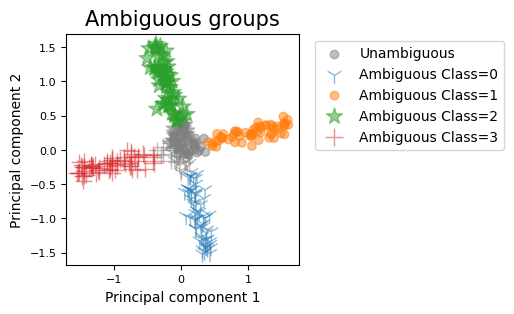

In [8]:
plt_ambiguous_groups_by_label(data1, sn.ambiguous_nodes, sn.cluster_labels, label1, show=True)

#### 3.3 k elbow to determine group numbers

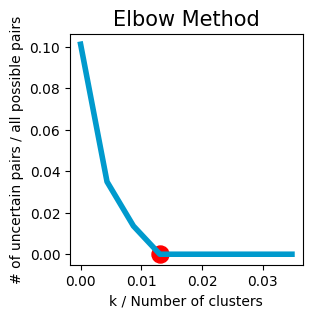

In [9]:
plt_k_elbow(x_step=sn.K_xstep, yerror=sn.K_yerror, best_k=sn.K, show=True)

#### 3.4 Alternative alignments

all vaild perms are:  [(0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]
perms:  (0, 1, 3, 2)
changed group id:  2 3
changed group id:  3 2


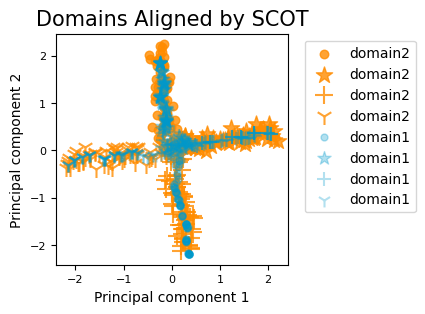

perms:  (0, 2, 1, 3)
changed group id:  1 2
changed group id:  2 1


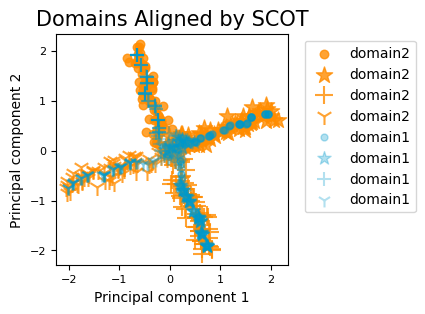

perms:  (0, 2, 3, 1)
changed group id:  1 2
changed group id:  2 3
changed group id:  3 1


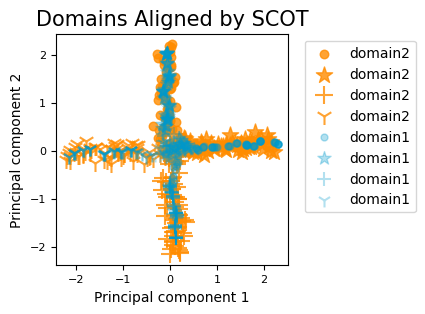

perms:  (0, 3, 1, 2)
changed group id:  1 3
changed group id:  2 1
changed group id:  3 2


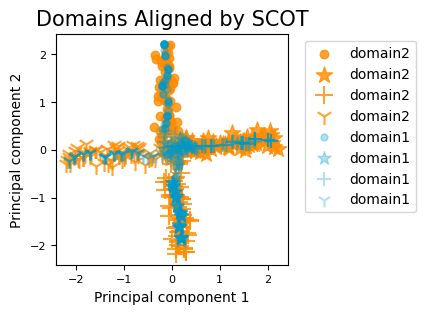

perms:  (0, 3, 2, 1)
changed group id:  1 3
changed group id:  3 1


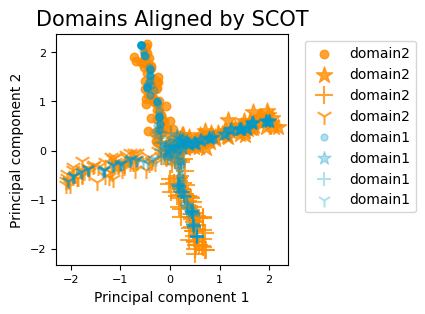

perms:  (1, 0, 2, 3)
changed group id:  0 1
changed group id:  1 0


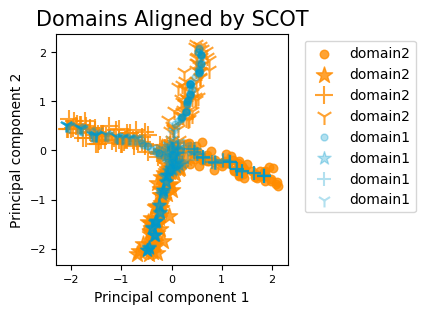

perms:  (1, 0, 3, 2)
changed group id:  0 1
changed group id:  1 0
changed group id:  2 3
changed group id:  3 2


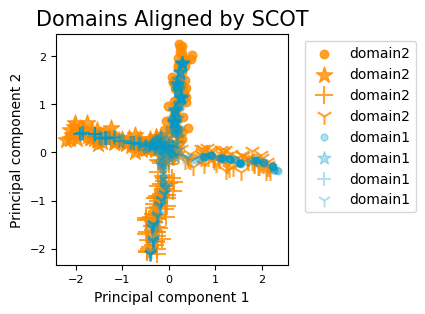

perms:  (1, 2, 0, 3)
changed group id:  0 1
changed group id:  1 2
changed group id:  2 0


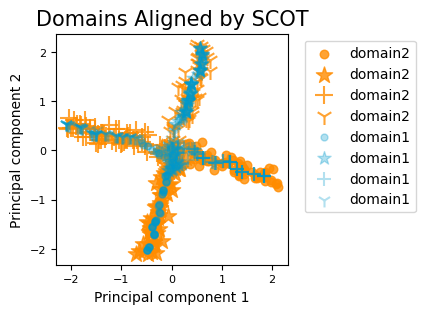

perms:  (1, 2, 3, 0)
changed group id:  0 1
changed group id:  1 2
changed group id:  2 3
changed group id:  3 0


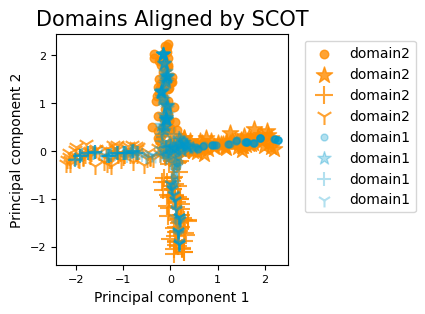

perms:  (1, 3, 0, 2)
changed group id:  0 1
changed group id:  1 3
changed group id:  2 0
changed group id:  3 2


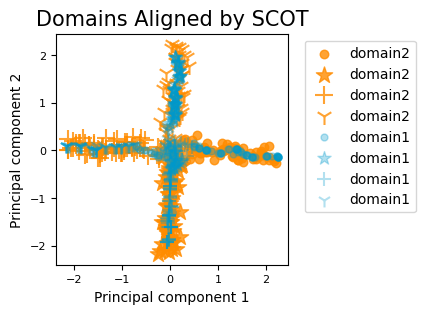

perms:  (1, 3, 2, 0)
changed group id:  0 1
changed group id:  1 3
changed group id:  3 0


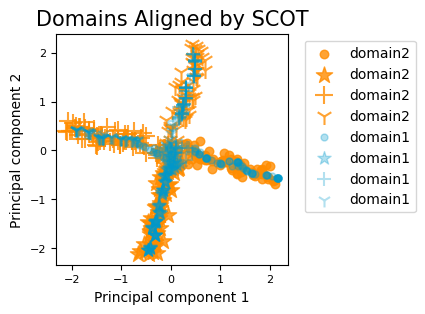

perms:  (2, 0, 1, 3)
changed group id:  0 2
changed group id:  1 0
changed group id:  2 1


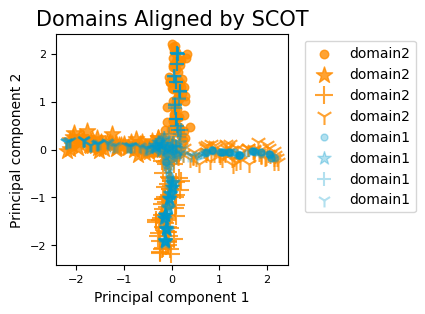

perms:  (2, 0, 3, 1)
changed group id:  0 2
changed group id:  1 0
changed group id:  2 3
changed group id:  3 1


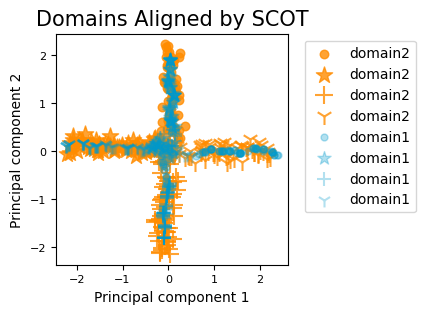

perms:  (2, 1, 0, 3)
changed group id:  0 2
changed group id:  2 0


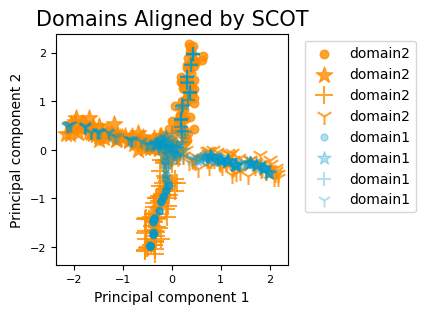

perms:  (2, 1, 3, 0)
changed group id:  0 2
changed group id:  2 3
changed group id:  3 0


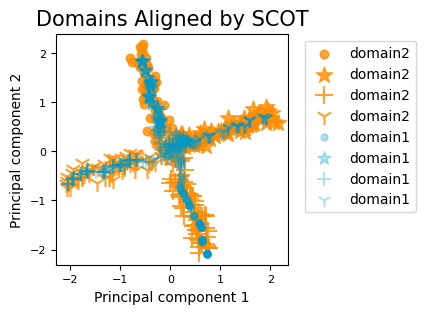

perms:  (2, 3, 0, 1)
changed group id:  0 2
changed group id:  1 3
changed group id:  2 0
changed group id:  3 1


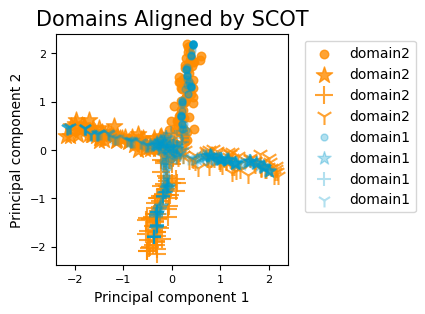

perms:  (2, 3, 1, 0)
changed group id:  0 2
changed group id:  1 3
changed group id:  2 1
changed group id:  3 0


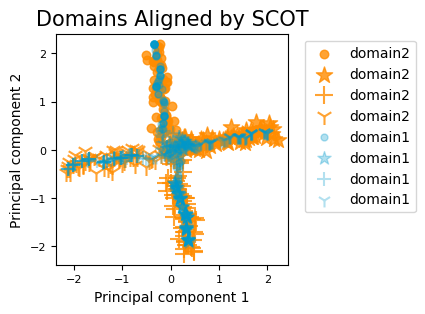

perms:  (3, 0, 1, 2)
changed group id:  0 3
changed group id:  1 0
changed group id:  2 1
changed group id:  3 2


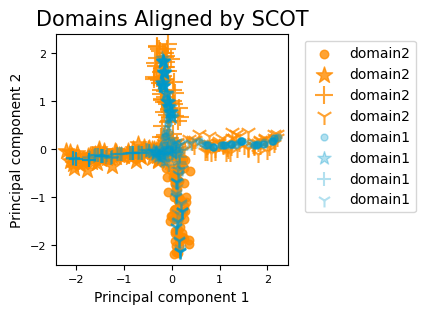

perms:  (3, 0, 2, 1)
changed group id:  0 3
changed group id:  1 0
changed group id:  3 1


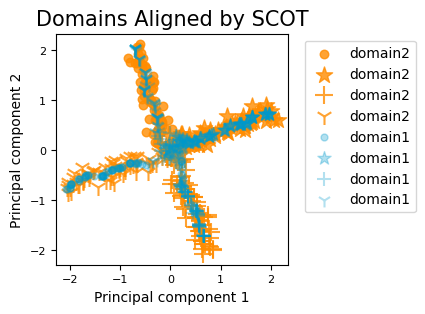

perms:  (3, 1, 0, 2)
changed group id:  0 3
changed group id:  2 0
changed group id:  3 2


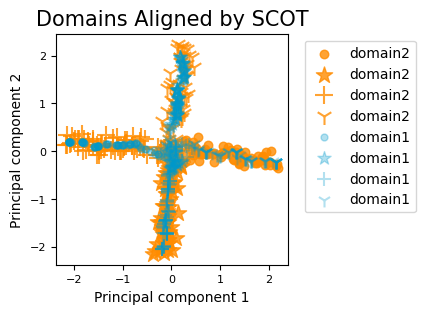

perms:  (3, 1, 2, 0)
changed group id:  0 3
changed group id:  3 0


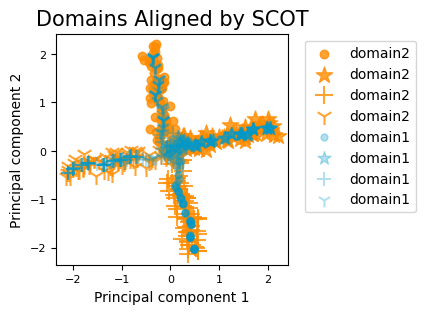

perms:  (3, 2, 0, 1)
changed group id:  0 3
changed group id:  1 2
changed group id:  2 0
changed group id:  3 1


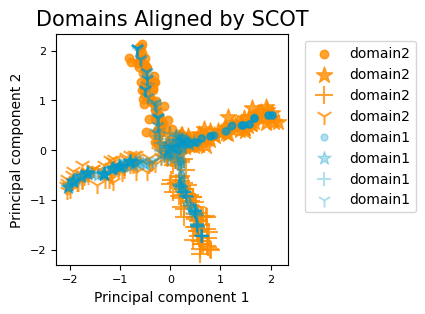

perms:  (3, 2, 1, 0)
changed group id:  0 3
changed group id:  1 2
changed group id:  2 1
changed group id:  3 0


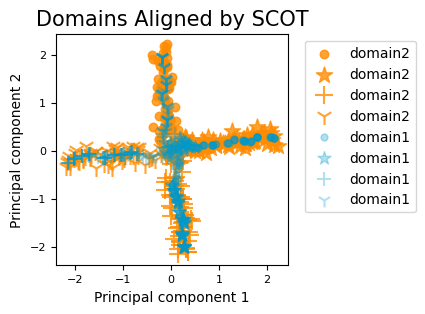

In [10]:

for idx, m in enumerate(alter_mappings, start=1):
    this_mapping = np.matmul(m, mapping)
    x_aligned, y_aligned = projection_barycentric(scot.X, scot.y, this_mapping, XontoY = cfg.plt.XontoY)
    plt_mapping_by_label(x_aligned, y_aligned, label1, label2, show=True)